In [1]:
# Import necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()

### Analyze the Data

In [2]:
# Display the first few rows of the messy data
messy_data.head()

,target,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,{
0,0.0,lv hypertrophy,0.531368,63,fixed defect,Cleveland,0.285812,typical angina,233.0,True,...,60.627689,Male,2.3,62.306825,145.0,-1.007833,0.0,61.730527,NaN,False
1,1.0,lv hypertrophy,-1.056253,67,normal,Cleveland,1.660947,asymptomatic,286.0,False,...,65.225088,Male,1.5,NaN,160.0,0.097395,3.0,66.310181,NaN,True
2,1.0,lv hypertrophy,0.438407,67,reversable defect,Cleveland,-0.305235,asymptomatic,229.0,False,...,66.956699,Male,2.6,65.493594,120.0,NaN,2.0,66.005086,NaN,True
3,0.0,normal,-1.413430,37,normal,Cleveland,0.887054,non-anginal,250.0,False,...,37.160246,Male,3.5,38.824367,130.0,-1.291802,0.0,37.473600,NaN,False
4,0.0,lv hypertrophy,-1.347216,41,normal,Cleveland,-0.558037,atypical angina,204.0,False,...,41.359067,Female,1.4,NaN,130.0,0.585360,0.0,41.363575,NaN,False


In [3]:
# Check data types and null values (can be obtained from the count column)
messy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  920 non-null    float64
 1   a       1193 non-null   object 
 2   b       1196 non-null   float64
 3   c       1196 non-null   int64  
 4   d       561 non-null    object 
 5   e       1196 non-null   object 
 6   f       1196 non-null   float64
 7   g       1196 non-null   object 
 8   h       1158 non-null   float64
 9   i       1087 non-null   object 
 10  j       591 non-null    float64
 11  k       1196 non-null   float64
 12  l       1196 non-null   float64
 13  m       778 non-null    object 
 14  n       1012 non-null   float64
 15  o       1008 non-null   float64
 16  p       1122 non-null   float64
 17  q       1009 non-null   float64
 18  r       1196 non-null   float64
 19  s       1196 non-null   object 
 20  t       1110 non-null   float64
 21  u       1079 non-null   float64
 22  

In [4]:
# Check basic statistics of the messy data
messy_data.describe()

,target,b,c,f,h,j,k,l,n,o,p,q,r,t,u,v,w,x,y,z
count,920.000000,1196.000000,1196.000000,1196.000000,1158.000000,591.000000,1196.000000,1196.000000,1012.000000,1008.000000,1122.000000,1009.000000,1196.000000,1110.000000,1079.000000,1116.000000,1079.000000,397.000000,1196.000000,598.000000
mean,0.553261,0.004015,53.383779,0.001391,200.583765,-0.600216,0.007269,-0.013268,4.904847,137.780754,137.660298,137.259233,53.376221,0.872252,53.328760,132.247312,0.034028,0.667506,53.379991,-0.757779
std,0.497426,0.984837,9.534033,1.011656,110.061582,1.067309,2.498874,0.958741,0.200283,26.175380,25.890960,25.790053,9.603964,1.077211,9.645423,18.872281,0.995701,0.924021,9.564497,1.257376
min,0.000000,-3.308750,28.000000,-2.820047,0.000000,-5.954661,-24.268796,-2.802329,4.094345,60.000000,60.522848,60.035804,27.548190,-2.600000,28.743286,0.000000,-3.087673,0.000000,26.549257,-7.293222
25%,0.000000,-0.692960,47.000000,-0.633350,176.250000,-1.113061,-0.722036,-0.636907,4.787492,120.000000,119.742012,119.041270,46.857255,0.000000,46.541317,120.000000,-0.601836,0.000000,46.931375,-1.316941
50%,1.000000,0.004241,54.000000,-0.051965,224.000000,-0.324872,0.002258,-0.000074,4.941642,140.000000,139.676137,139.602369,54.126896,0.500000,54.148423,130.000000,0.035589,0.000000,54.448992,-0.439484
75%,1.000000,0.714572,60.000000,0.693539,270.000000,0.136188,0.699648,0.642745,5.062595,157.000000,157.382495,156.970305,60.324072,1.500000,60.418600,140.000000,0.723486,1.000000,59.812460,0.094453
max,1.000000,2.982511,77.000000,3.323155,603.000000,1.369476,27.315031,3.328148,5.273000,202.000000,200.680509,202.572685,77.484697,6.200000,78.520864,200.000000,3.933288,3.000000,79.712348,1.202416


### 2. Identify Issues

In [5]:
# Count missing values in each column
missing_values = messy_data.isnull().sum()
print ("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
target    276
a           3
d         635
h          38
i         109
j         605
m         418
n         184
o         188
p          74
q         187
t          86
u         117
v          80
w         117
x         799
z         598
{          74
dtype: int64


In [6]:
# Check for duplicates
print(messy_data.columns[messy_data.columns.duplicated()])
# Check for columns with all identical values
print (messy_data.columns[messy_data.nunique() <= 1])

Index([], dtype='object')
Index([], dtype='object')


In [7]:
# Check for incosistent data types
object_columns = messy_data.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"Column '{col}' unique values: {messy_data[col].unique()}")

Column 'a' unique values: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Column 'd' unique values: ['fixed defect' 'normal' 'reversable defect' nan]
Column 'e' unique values: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Column 'g' unique values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Column 'i' unique values: [True False nan]
Column 'm' unique values: ['downsloping' 'flat' 'upsloping' nan]
Column 's' unique values: ['Male' 'Female']
Column '{' unique values: [False True nan]


### Inference
1. The following columns have nan - a, d,i, m, {

In [8]:
# Categorical columns that need encoding
categorical_columns = messy_data.select_dtypes(include=['object', 'category']).columns.tolist()
boolean_columns = messy_data.select_dtypes(include=['bool']).columns.tolist()

# Columns that need encoding - columns with more than 1 non-null unique value
cat_columns_to_encode = [col for col in categorical_columns if messy_data[col].nunique() > 1]
bool_columns_to_encode = [col for col in boolean_columns if messy_data[col].nunique() > 1]

print("Columns to encode:", cat_columns_to_encode)
print("Boolean columns to encode:", bool_columns_to_encode)

Columns to encode: ['a', 'd', 'e', 'g', 'i', 'm', 's', '{']
Boolean columns to encode: []


In [9]:
# Identify outliers with visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Plot a boxplot to visualize outliers
numeric_columns = messy_data.select_dtypes(include=['float64', 'int64']).columns
print(f"Numeric columns for outlier detection: {len(numeric_columns)}")
# columns with more than 2 unique values are considered informative and will be used for outlier detection
informative_columns = [col for col in numeric_columns if messy_data[col].nunique() > 2]
print (f"Informative column count for outlier detection: {len(informative_columns)}")
# Reduce the number of columns for visualization using z-score method
z_scores = messy_data[informative_columns].apply(zscore).abs()
# Count the number of outliers in each column
outlier_counts = (z_scores > 3).sum()
columns_with_outliers = outlier_counts[outlier_counts > 0].index.tolist()
print (f"Column count with outliers: {len(columns_with_outliers)}")

Numeric columns for outlier detection: 20
Informative column count for outlier detection: 19
Column count with outliers: 4


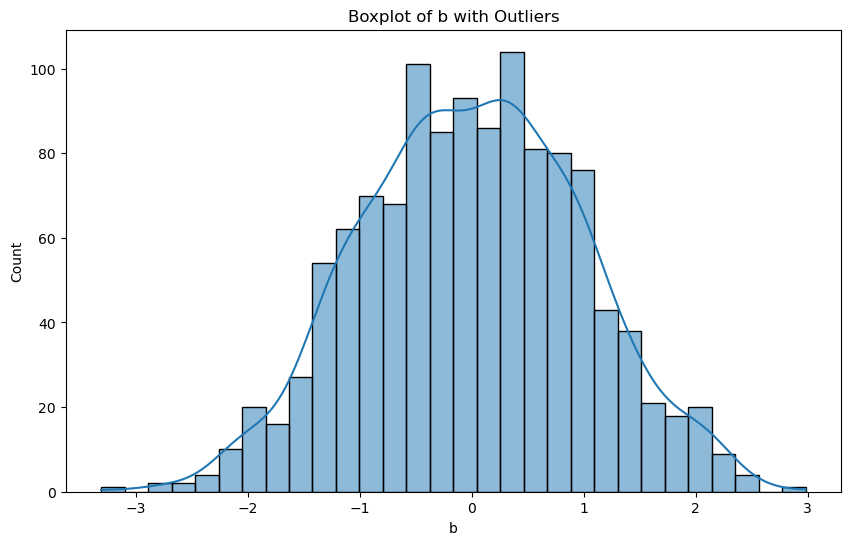

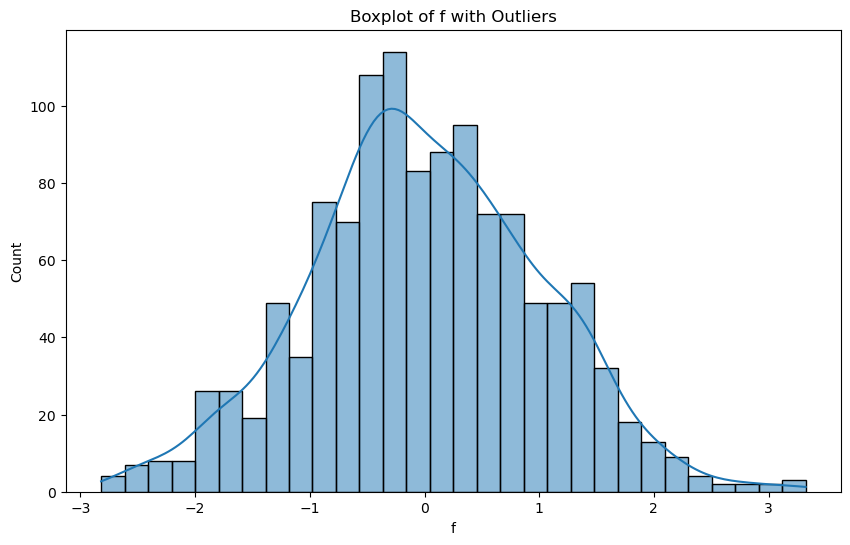

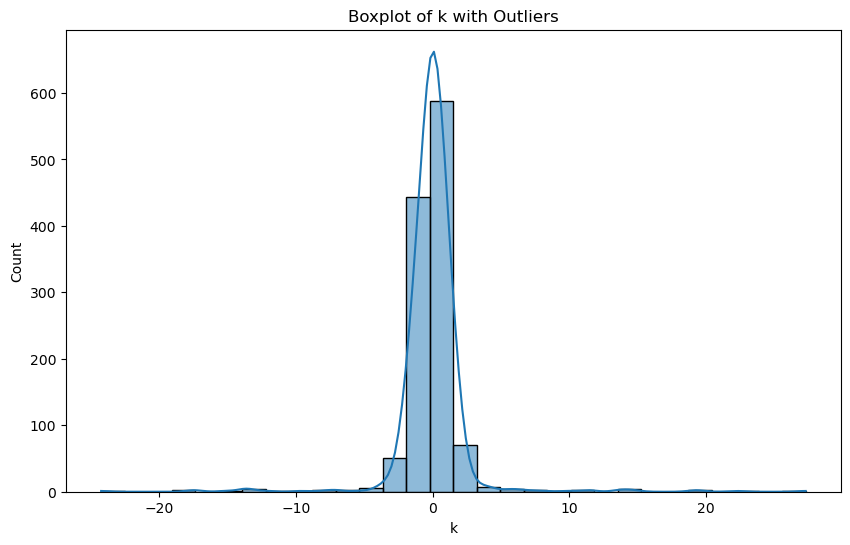

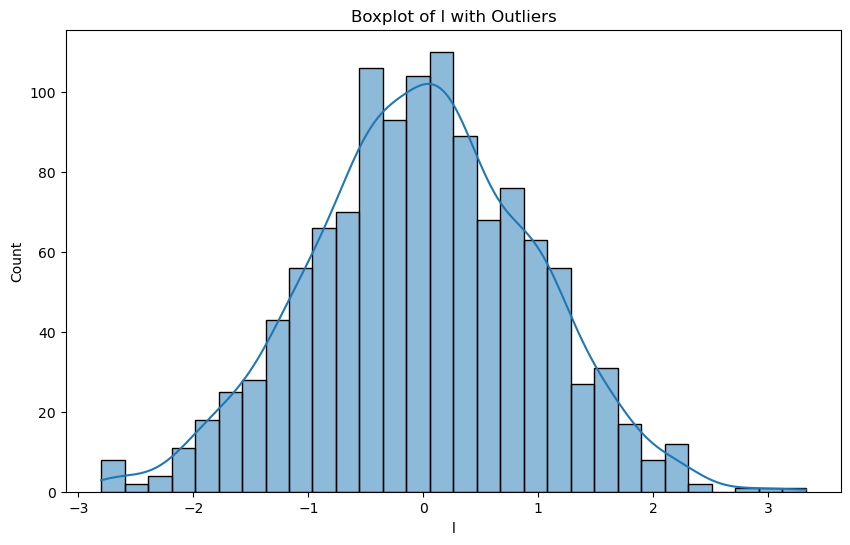

In [10]:
# Visualize columns with outliers
for col in columns_with_outliers:
    plt.figure(figsize=(10, 6))
    sns.histplot(messy_data[col], bins=30, kde=True)
    plt.title(f'Boxplot of {col} with Outliers')
    plt.show()

In [11]:
import data_preprocessor as dp
# Step 1 - Imputation of missing values
print ("Before Imputation:")
print (messy_data.isnull().sum())

Before Imputation:
target    276
a           3
b           0
c           0
d         635
e           0
f           0
g           0
h          38
i         109
j         605
k           0
l           0
m         418
n         184
o         188
p          74
q         187
r           0
s           0
t          86
u         117
v          80
w         117
x         799
y           0
z         598
{          74
dtype: int64


In [12]:
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
print ("After Imputation:")
print (clean_data.isnull().sum())

After Imputation:
target    276
a           3
b           0
c           0
d         635
e           0
f           0
g           0
h           0
i         109
j           0
k           0
l           0
m         418
n           0
o           0
p           0
q           0
r           0
s           0
t           0
u           0
v           0
w           0
x           0
y           0
z           0
{          74
dtype: int64


c:\Users\SHEONA HANS\OneDrive\Documents\Course\ML & AI\BINF-5507-Materials\Assignment1\Scripts\data_preprocessor.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [13]:
print ("Shape before removing duplicates:", messy_data.shape)
clean_data = dp.remove_duplicates(clean_data)
print ("Shape after removing duplicates:", clean_data.shape)

Shape before removing duplicates: (1196, 28)
Shape after removing duplicates: (1196, 28)


In [14]:
print ("Before Normalization:")
print (messy_data.describe())

Before Normalization:
           target            b            c            f            h  \
count  920.000000  1196.000000  1196.000000  1196.000000  1158.000000   
mean     0.553261     0.004015    53.383779     0.001391   200.583765   
std      0.497426     0.984837     9.534033     1.011656   110.061582   
min      0.000000    -3.308750    28.000000    -2.820047     0.000000   
25%      0.000000    -0.692960    47.000000    -0.633350   176.250000   
50%      1.000000     0.004241    54.000000    -0.051965   224.000000   
75%      1.000000     0.714572    60.000000     0.693539   270.000000   
max      1.000000     2.982511    77.000000     3.323155   603.000000   

                j            k            l            n            o  \
count  591.000000  1196.000000  1196.000000  1012.000000  1008.000000   
mean    -0.600216     0.007269    -0.013268     4.904847   137.780754   
std      1.067309     2.498874     0.958741     0.200283    26.175380   
min     -5.954661   -24.2687

In [15]:
clean_data = dp.normalize_data(clean_data)
print ("After Normalization:")
print (clean_data.describe())

After Normalization:
           target            b            c            f            h  \
count  920.000000  1196.000000  1196.000000  1196.000000  1196.000000   
mean     0.553261     0.526566     0.518036     0.459278     0.332643   
std      0.497426     0.156540     0.194572     0.164679     0.179598   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.415781     0.387755     0.355954     0.296849   
50%      1.000000     0.526602     0.530612     0.450593     0.369818   
75%      1.000000     0.639510     0.653061     0.571947     0.444859   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

                 j            k            l            n            o  \
count  1196.000000  1196.000000  1196.000000  1196.000000  1196.000000   
mean      0.731068     0.470614     0.454950     0.687651     0.547752   
std       0.102394     0.048443     0.156389     0.156296     0.169214   
min       0.000000     0.

In [16]:
print ("Shape before removing redundant_features:", messy_data.shape)
clean_data = dp.remove_redundant_features(clean_data)
print ("Shape after removing redundant_features:", clean_data.shape)

Shape before removing redundant_features: (1196, 28)
Shape after removing redundant_features: (1196, 22)


In [17]:
# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)

In [18]:
clean_data.shape

(1196, 22)

In [19]:
from data_preprocessor import simple_model
# 4. Train and evaluate the model
# Check if target is categorical as simple_model expects a categorical target. If not, convert it.
# if clean_data['target'].dtype != 'category':
#     clean_data['target'] = clean_data['target'].astype('category')

# simple_model(clean_data)
print (f"Target column values:{clean_data['target'].nunique()}")
# Target column has nan and for categorical target, we need to drop rows with nan in target column
clean_data = clean_data.dropna(subset=['target'])
print (f"Target column values:{clean_data['target'].nunique()}")
# Convert target column to categorical type
clean_data['target'] = clean_data['target'].astype('category')

Target column values:2
Target column values:2


In [20]:
simple_model(clean_data)


Accuracy: 0.8533333333333334
